# FINAL PROJECT - DATA PRE-PROCESSING 

## Exercise 2 - Winery

We are going to extract some curiosities about data referring to different wines in the world, this information has been extracted from the web https://www.winemag.com/?s=&drink_type=wine which collects information about the origin of the wine, its score , price, tasters, general wine information, etc.
Specifically, we are going to work with the following data sources:
* winemag-data_first150k.csv
* winemag-data-130k-v2.json

In both we can find very similar information in terms of columns for the csv file or key fields for the json file:
* country: Country of origin of the wine.
* description: Description of the taster about the properties of the wine.
* designation: Wine category.
* points: Score given by winemag users
* price: Price of the wine.
* province: Province of the wine country.
* region_1: Wine Region 1
* region_2: Wine Region 2
* variety: Grape variety.
* winery: Production and maturation cellar.

More information about the datasets can be found on the web with the original Kaggle data https://www.kaggle.com/zynicide/wine-reviews

With this information, the following is requested:
1. Load both files, the .csv as pandas dataframe and the .json as json
2. Get a single dataframe that is the union of both files that only has the following columns:
    * country
    * designation
    * points
    * price
    * state
    * winery
3. Are there duplicates in the dataframe? Delete all duplicate rows
4. Make a study of the null values of the dataset, assign a zero to all the columns that have a null value in the price, after that, delete the rest of the null values of the dataframe. What is the resulting number of rows?
5. Obtain a subset with all the wines that are from Spain and that also include the word reserve 'reserva' in the designation of origin. Hint: To locate a text string in a column you can use the str.contains function https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html
6. Of the previous sub-set with the Spanish reserve wines, do they have a higher average score than all the wines or a lower one?
7. Take again the sub-set of Spanish reserve wines, in general, in Spain the wines from Rioja (a province in the north of Spain, North Spain will appear in the dataset) have great fame, therefore , it is to be expected that this province or region is the one with the most wines in this sub-set, check whether this statement is true graphically.
8. Shows the top 10 of the best valued wines.
9. Shows the average price of wines in each country. Which country has the highest average price? Does this country appear in the top 10 above?
10. Graphically shows the price over the score based on the province of the subset of Spanish reserve wines. Which province has the most expensive wine? Is the north of Spain still the province with the best valued reserve wine?

In [1]:
import json
import pandas as pd

# 1
1. Load both files, the .csv as pandas dataframe and the .json as json

In [2]:
df_one = pd.read_csv("winemag-data_first150k.csv")

In [3]:
df_one.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez


In [4]:
with open("winemag-data-130k-v2.json") as f:
    json_df = json.load(f)

In [5]:
json_df[0]

{'points': '87',
 'title': 'Nicosia 2013 Vulkà Bianco  (Etna)',
 'description': "Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",
 'taster_name': 'Kerin O’Keefe',
 'taster_twitter_handle': '@kerinokeefe',
 'price': None,
 'designation': 'Vulkà Bianco',
 'variety': 'White Blend',
 'region_1': 'Etna',
 'region_2': None,
 'province': 'Sicily & Sardinia',
 'country': 'Italy',
 'winery': 'Nicosia'}

In [6]:
len(json_df)

129971

In [7]:
len(df_one)

150930

In [8]:
print("All rows --> ", len(df_one) + len(json_df))

All rows -->  280901


# 2

2. Get a single dataframe that is the union of both files that only has the following columns:
    *country
    * designation
    * points
    * price
    * state
    * winery

In [9]:
country = []
designation = []
points = []
price = []
province = []
winery = []

In [10]:
for item in json_df:
    country.append(item["country"])
    designation.append(item['designation'])
    points.append(item['points'])
    price.append(item['price'])
    province.append(item['province'])
    winery.append(item['winery'])

In [11]:
country = country + list(df_one['country'])
designation = designation + list(df_one['designation']) 
points = points + list(df_one['points']) 
price = price + list(df_one['price'])
province = province + list(df_one['province'])
winery = winery + list(df_one['winery'])

In [12]:
print(len(country))
print(len(designation))
print(len(points))
print(len(price))
print(len(province))
print(len(winery))

280901
280901
280901
280901
280901
280901


In [13]:
df = pd.DataFrame({
    'country' : country,
    'designation' : designation,
    'points' : points,
    'price' : price,
    'province' : province,
    'winery' : winery
}).reset_index(drop=True, inplace=False)

In [14]:
df.head()

,country,designation,points,price,province,winery
0,Italy,Vulkà Bianco,87,NaN,Sicily & Sardinia,Nicosia
1,Portugal,Avidagos,87,15.0,Douro,Quinta dos Avidagos
2,US,None,87,14.0,Oregon,Rainstorm
3,US,Reserve Late Harvest,87,13.0,Michigan,St. Julian
4,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Sweet Cheeks


In [15]:
df.shape

(280901, 6)

In [16]:
df.columns

Index(['country', 'designation', 'points', 'price', 'province', 'winery'], dtype='object')

###  2nd version Pandas read_json

In [17]:
df_json = pd.read_json("winemag-data-130k-v2.json")

In [18]:
print("Total Rows --> ", len(df_one) + len(df_json))

Total Rows -->  280901


In [19]:
df_two = pd.concat([df_one, df_json], ignore_index=True)[['country', 'designation', \
                                                          'points', 'price', 'province', 'winery']]

In [20]:
df_two.shape

(280901, 6)

# 3

3. Are there duplicates in the dataframe? Delete all duplicate rows

In [21]:
# Before remove duplicated
df_two.shape

(280901, 6)

In [22]:
df_two.drop_duplicates(inplace = True)

In [23]:
df_two = df_two.reset_index(drop = True)

In [24]:
# After remove duplicated
df_two.shape

(155432, 6)

# 4

4. Make a study of the null values of the dataset, assign a zero to all the columns that have a null value in the price, after that, delete the rest of the null values of the dataframe. What is the resulting number of rows?

In [25]:
print("*Amount of nulls by column")
print(df_two.isnull().sum())
print("----------------------------------")
print("*Percentage of nulls by column")
print(df_two.isnull().sum()/len(df_two)*100)

*Amount of nulls by column
country           58
designation    43546
points             0
price          11779
province          58
winery             0
dtype: int64
----------------------------------
*Percentage of nulls by column
country         0.037315
designation    28.016110
points          0.000000
price           7.578234
province        0.037315
winery          0.000000
dtype: float64


In [26]:
df_two.price = df_two.price.fillna(0)

In [27]:
df_two = df_two.dropna().reset_index(drop = True)

In [28]:
df_two.index

RangeIndex(start=0, stop=111838, step=1)

In [29]:
len(df_two)

111838

In [30]:
print("*Amount of nulls by column")
print(df_two.isnull().sum())
print("----------------------------------")
print("*Percentage of nulls by column")
print(df_two.isnull().sum()/len(df_two)*100)

*Amount of nulls by column
country        0
designation    0
points         0
price          0
province       0
winery         0
dtype: int64
----------------------------------
*Percentage of nulls by column
country        0.0
designation    0.0
points         0.0
price          0.0
province       0.0
winery         0.0
dtype: float64


# 5

5. Obtain a subset with all the wines that are from Spain and that also include the word reserve 'reserva' in the designation of origin. Hint: To locate a text string in a column you can use the str.contains function https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html

In [31]:
df_two.head()

,country,designation,points,price,province,winery
0,US,Martha's Vineyard,96,235.0,California,Heitz
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Bodega Carmen Rodríguez
2,US,Special Selected Late Harvest,96,90.0,California,Macauley
3,US,Reserve,96,65.0,Oregon,Ponzi
4,France,La Brûlade,95,66.0,Provence,Domaine de la Bégude


In [32]:
df_spain_reserva = df_two[ (df_two['country'] == "Spain") & (df_two['designation'].str.contains("Reserva"))].copy()

# 6

6. Of the previous sub-set with the Spanish reserve wines, do they have a higher average score than all the wines or a lower one?

In [33]:
df_two.points.value_counts()

88     13879
87     13437
90     13422
89     10663
91     10106
86      9954
92      8918
85      7505
93      6290
84      5570
94      3596
83      2933
82      1821
95      1605
81       736
96       576
80       449
97       239
98        84
99        35
100       20
Name: points, dtype: int64

In [34]:
df_two['points'] = pd.to_numeric(df_two["points"])

In [35]:
df_two.drop_duplicates(inplace = True)

In [36]:
df_two.shape

(111838, 6)

In [37]:
df_two.points.value_counts()

88     13879
87     13437
90     13422
89     10663
91     10106
86      9954
92      8918
85      7505
93      6290
84      5570
94      3596
83      2933
82      1821
95      1605
81       736
96       576
80       449
97       239
98        84
99        35
100       20
Name: points, dtype: int64

In [38]:
df_spain_reserva.shape

(1137, 6)

In [39]:
df_spain_reserva['points'] = pd.to_numeric(df_spain_reserva['points'])

In [40]:
df_spain_reserva.drop_duplicates(inplace = True)

In [41]:
df_spain_reserva.shape

(1137, 6)

In [42]:
df_spain_reserva.describe()['points']['mean']

88.2462620932278

In [43]:
df_two.describe()['points']['mean'] # More lower

88.56784813748457

# 7

7. Take again the sub-set of Spanish reserve wines, in general, in Spain the wines from Rioja (a province in the north of Spain, North Spain will appear in the dataset) have great fame, therefore , it is to be expected that this province or region is the one with the most wines in this sub-set, check whether this statement is true graphically.

In [44]:
groups = df_spain_reserva.province.value_counts()
groups

Northern Spain    806
Catalonia         251
Central Spain      45
Levante            30
Andalucia           4
Spain Other         1
Name: province, dtype: int64

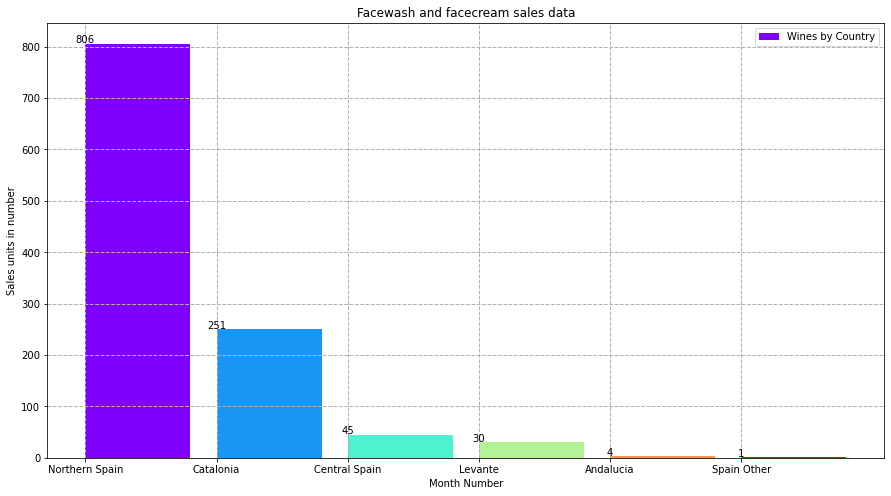

In [45]:
import matplotlib.pyplot as plt  
import numpy as np
from matplotlib.pyplot import cm

fig, ax = plt.subplots(1,1, figsize=(15,8))

ax.bar(groups.keys(), groups.values, label = 'Wines by Region', align='edge',  
       color = cm.rainbow(np.linspace(0, 1, len(groups.keys()))))
for i in range(len(groups.values)):
    ax.text(i, groups.values[i]+1, groups.values[i], horizontalalignment='center')
    
    
plt.xlabel('Month Number')
plt.ylabel('Sales units in number')
plt.legend(loc='upper right')
plt.grid(True, linewidth= 1, linestyle="--")
plt.title('Wines by Region')
plt.show()

# 8

8. Shows the top 10 of the best valued wines.

In [46]:
df_two.sort_values(by = 'points', ascending=False).head(10)

,country,designation,points,price,province,winery
106948,Portugal,Nacional Vintage,100,650.0,Port,Quinta do Noval
12836,US,En Chamberlin Vineyard,100,65.0,Oregon,Cayuse
19214,Italy,Guado de' Gemoli,100,195.0,Tuscany,Giovanni Chiappini
16178,Italy,Masseto,100,460.0,Tuscany,Tenuta dell'Ornellaia
56394,Italy,Occhio di Pernice,100,210.0,Tuscany,Avignonesi
98342,France,Cristal Vintage Brut,100,250.0,Champagne,Louis Roederer
98343,France,Le Mesnil Blanc de Blancs Brut,100,617.0,Champagne,Salon
79306,France,Brut,100,259.0,Champagne,Krug
105872,Italy,Cerretalto,100,270.0,Tuscany,Casanova di Neri
106573,US,Royal City,100,80.0,Washington,Charles Smith


# 9 

9. Shows the average price of wines in each country. Which country has the highest average price? Does this country appear in the top 10 above?

In [47]:
df_two.groupby('country')['price'].mean().sort_values(ascending=False)

country
England                   49.428571
Hungary                   48.596491
Germany                   40.901890
US                        39.634244
Canada                    39.448454
Australia                 37.638085
Italy                     35.806996
France                    33.413528
Lebanon                   32.305556
Israel                    31.976891
Spain                     29.997487
Luxembourg                29.875000
Switzerland               28.750000
New Zealand               28.103648
Austria                   27.974194
Turkey                    27.571429
Mexico                    27.454545
Argentina                 26.621014
Uruguay                   26.066667
Slovenia                  26.050000
Croatia                   25.140625
Serbia                    24.666667
South Africa              24.137238
Japan                     24.000000
Portugal                  23.100293
Greece                    22.709742
Brazil                    22.705882
Czech Republic      

# 10

10. Graphically shows the price over the score based on the province of the subset of Spanish reserve wines. Which province has the most expensive wine? Is the north of Spain still the province with the best valued reserve wine?

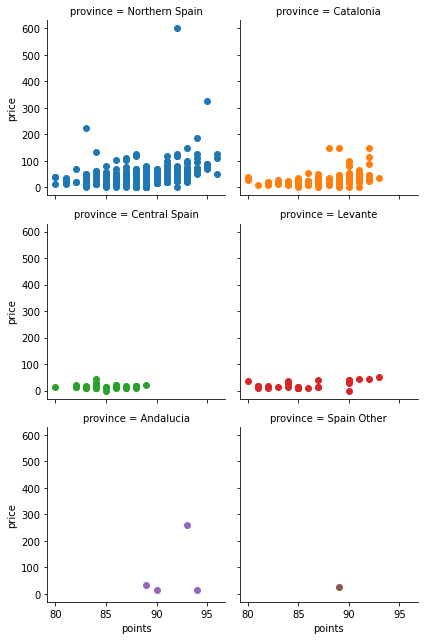

In [48]:
import seaborn as sns

g = sns.FacetGrid(df_spain_reserva, col='province', hue = "province", height=3, col_wrap = 2)
g.map(plt.scatter, "points", "price")